<a href="https://colab.research.google.com/github/waghvaishnav/Machine-Learning-Algorithms-and-Data-Processing-Playground-hub/blob/main/K_Means_Clustering_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Customer Segmentation using K-Means Clustering ⁉

Dataset Used : https://github.com/waghvaishnav/Machine-Learning-Algorithms-and-Data-Processing-Playground-hub/blob/07e17eee11252e2a6a2ca8719fdeed6d79a20ed4/income.csv

In [ ]:
from google.colab import files
files.upload()

Saving income.csv to income.csv


{'income.csv': b'Name,Age,Income($)\r\nRob,27,70000\r\nMichael,29,90000\r\nMohan,29,61000\r\nIsmail,28,60000\r\nKory,42,150000\r\nGautam,39,155000\r\nDavid,41,160000\r\nAndrea,38,162000\r\nBrad,36,156000\r\nAngelina,35,130000\r\nDonald,37,137000\r\nTom,26,45000\r\nArnold,27,48000\r\nJared,28,51000\r\nStark,29,49500\r\nRanbir,32,53000\r\nDipika,40,65000\r\nPriyanka,41,63000\r\nNick,43,64000\r\nAlia,39,80000\r\nSid,41,82000\r\nAbdul,39,58000\r\n\r\n\r\n'}

In [ ]:
import pandas as pd

data = pd.read_csv("income.csv")
df = pd.DataFrame(data)

df.sample(6)

,Name,Age,Income($)
13,Jared,28,51000
17,Priyanka,41,63000
1,Michael,29,90000
18,Nick,43,64000
12,Arnold,27,48000
4,Kory,42,150000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

df_scaled = pd.DataFrame(
    sc.fit_transform(df[["Age", "Income($)"]]),
    columns=["age", "income"])

df_scaled.sample(5)

,age,income
13,0.117647,0.051282
14,0.176471,0.038462
9,0.529412,0.726496
0,0.058824,0.213675
16,0.823529,0.170940


<Axes: xlabel='age', ylabel='income'>

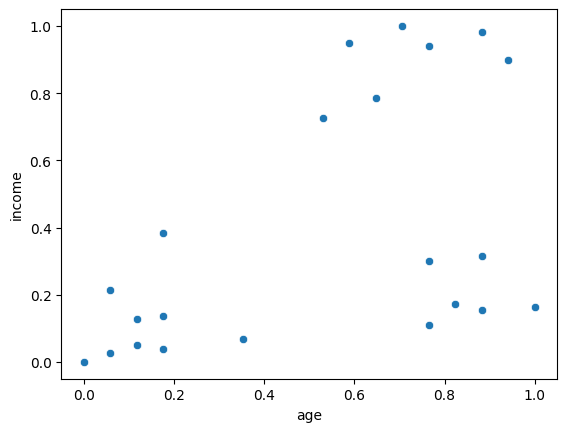

In [ ]:
import seaborn as sns
sns.scatterplot(data=df_scaled,x="age",y="income")

### model training :

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3,n_init="auto")

model.fit(df_scaled[["age","income"]])

clusters = model.labels_
clusters

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [ ]:
# centroids of clusters :

centroids = model.cluster_centers_

centroids

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

<Axes: xlabel='age', ylabel='income'>

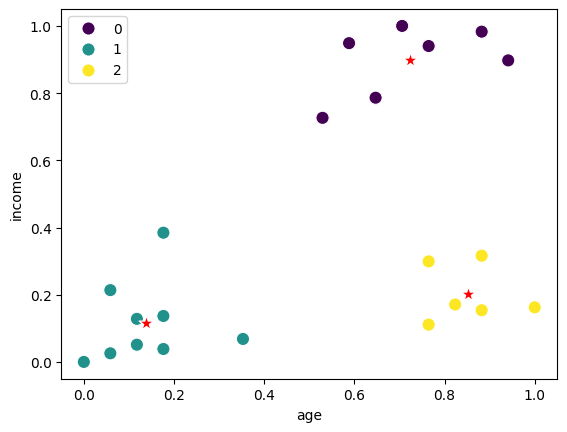

In [ ]:
sns.scatterplot(data = df_scaled,x = "age",y = "income",hue=clusters,palette="viridis",s=90)
sns.scatterplot(x = centroids[:,0],y = centroids[:,1],s=125,marker="*",color="red")

## Elbow method  : selection of the best K value :

In [ ]:
SSE = []

k_rng = range(1,10)

for i in k_rng:
  km = KMeans(n_clusters=i,n_init="auto")
  km.fit(df_scaled[["age","income"]])
  SSE.append(km.inertia_)

In [ ]:
SSE

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2798062931046179,
 0.23377969754548303,
 0.20293722268184758,
 0.15709935102254627,
 0.10188787724979426]

Text(0.5, 1.0, 'Elbow method for choosing best k value or cluster value')

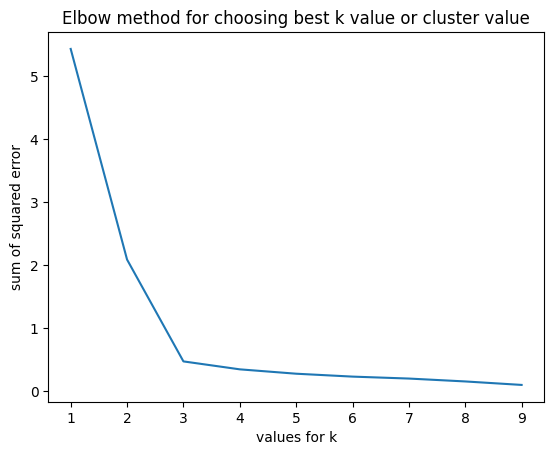

In [ ]:
import matplotlib.pyplot as plt
plt.plot(k_rng,SSE)
plt.xlabel("values for k")
plt.ylabel("sum of squared error")
plt.title("Elbow method for choosing best k value or cluster value")